# install & import

In [ ]:
!pip install kozip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 MB 2.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date

from kozip import KoZIP

%matplotlib inline

# new_member_list

In [ ]:
m_l = pd.read_csv('회원 명단 리스트.csv')

In [ ]:
m_l.head()

,MB_IDX,MB_AGE,zipcode,job,favorite_idx
0,112,1983,1439.0,NaN,무고사
1,137,1984,22825.0,회사원(사무직/연구직),정혁
2,153,1959,21527.0,자영업자,김도혁
3,180,1984,4941.0,NaN,아길라르
4,208,1993,23025.0,교사,김도혁


## zipcode를 주소로 변경

In [ ]:
for i in range(len(m_l)):
    if ~m_l['zipcode'].isna()[i]:
        m_l.loc[i, 'zipcode'] = str(m_l.loc[i, 'zipcode']).replace('.0','') # .0 제거
        if len(m_l.loc[i, 'zipcode']) == 4: # 5자리 맞추기 위해 길이가 4면 앞에 0 추가
            m_l.loc[i, 'zipcode'] = '0' + m_l.loc[i, 'zipcode']

kozip = KoZIP()

list_ = []

for i in list(m_l['zipcode']):
    if type(i) == str:
        try:
            list_.append(kozip.ZIPtoAddr(i, depth=1))
        except: # kozip에서 zipcode를 매칭 하지 못하는 경우가 있음
            list_.append([1])
    else: # 결측치인 경우가 있음
        list_.append([0])

m_l['address'] = list_

m_l['address'] = m_l['address'].apply(lambda x: x[0])

In [ ]:
m_l[m_l['address'] == 1] # kozip에서 zipcode를 매칭 하지 못하는 경우

,MB_IDX,MB_AGE,zipcode,job,favorite_idx,address
12683,148794,1994,12821,NaN,무고사,1
13381,149493,1985,15120,회사원(사무직/연구직),이명주,1
13848,149961,1982,22860,자영업자,이명주,1
14151,150264,1987,15120,전업주부,에르난데스,1
14644,150757,1988,15120,서비스업 종사자,이태희,1
15088,151204,1983,15121,전업주부,이용재,1
15653,151770,1986,15120,프리랜서,에르난데스,1


In [ ]:
print(list(set(m_l[m_l['address'] == 1]['zipcode'])))
# 12821 15120 15121 경기도 22860 인천광역시

['12821', '22860', '15120', '15121']


In [ ]:
for i in list(set(m_l[m_l['address'] == 1]['zipcode'])):
    if i == '22860':
        m_l.loc[m_l['zipcode'] == i, 'address'] = '인천광역시'
    else:
        m_l.loc[m_l['zipcode'] == i, 'address'] = '경기도'

In [ ]:
# 지역별로 묶기
for i, j in enumerate(m_l['address']):
    if j == '인천광역시' or j == 0:
        m_l.loc[i, 'region'] = j
    elif j == '경기도' or j == '서울특별시':
        m_l.loc[i, 'region'] = '수도권'
    else:
        m_l.loc[i, 'region'] = '그 외'

## 나이로 변경, 나이 그룹 추가

In [ ]:
m_l['MB_AGE'] = m_l['MB_AGE'].apply(lambda x: 2022 - x)
m_l['age_group'] = m_l['MB_AGE'].apply(lambda x: x // 10 * 10)

## 정리

In [ ]:
m_l = m_l[['MB_IDX','MB_AGE','age_group','region','job','favorite_idx']]

In [ ]:
m_l.loc[m_l[m_l['region'] == 0].index, 'region'] = np.nan

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
m_l.head()

,MB_IDX,MB_AGE,age_group,region,job,favorite_idx
0,112,39,30,수도권,NaN,무고사
1,137,38,30,인천광역시,회사원(사무직/연구직),정혁
2,153,63,60,인천광역시,자영업자,김도혁
3,180,38,30,수도권,NaN,아길라르
4,208,29,20,인천광역시,교사,김도혁


## 저장

In [ ]:
m_l.to_csv('new_member_list.csv',index=False)



---



# new_survey_complete

In [ ]:
s_c = pd.read_csv('/content/survey_complete_.csv')
s_c.head()

,idx,survey_idx,state,start_date,end_date,MB_IDX,MB_AGE,zipcode,job,favorite_idx
0,41,24,C,2020-09-03 17:28:21,2020-09-03 17:33:34,1353,1996,22230.0,대학생(대학원생 포함),송시우
1,46,24,C,2020-09-03 17:26:03,2020-09-03 17:29:55,102758,1988,21340.0,회사원(사무직/연구직),김도혁
2,49,24,C,2020-09-03 17:26:12,2020-09-03 17:28:56,107675,1974,10884.0,기타,김도혁
3,51,24,C,2020-09-03 17:58:37,2020-09-03 18:01:44,105239,1983,21602.0,회사원(사무직/연구직),김동민
4,56,24,C,2020-09-04 08:32:31,2020-09-04 08:47:29,116324,1973,21610.0,서비스업 종사자,송시우


In [ ]:
s_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5802 entries, 0 to 5801
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   idx           5802 non-null   int64  
 1   survey_idx    5802 non-null   int64  
 2   state         5802 non-null   object 
 3   start_date    5802 non-null   object 
 4   end_date      5802 non-null   object 
 5   MB_IDX        5802 non-null   int64  
 6   MB_AGE        5802 non-null   int64  
 7   zipcode       5793 non-null   float64
 8   job           5412 non-null   object 
 9   favorite_idx  5802 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 453.4+ KB


In [ ]:
s_c.isna().sum()

idx               0
survey_idx        0
state             0
start_date        0
end_date          0
MB_IDX            0
MB_AGE            0
zipcode           9
job             390
favorite_idx      0
dtype: int64

## 정리

In [ ]:
s_c = s_c.drop(['state','MB_AGE','zipcode','job','favorite_idx'], axis=1)

In [ ]:
s_c['start_date'] = pd.to_datetime(s_c['start_date'])
s_c['end_date'] = pd.to_datetime(s_c['end_date'])

In [ ]:
s_c = s_c.rename(columns={'idx':'svc_idx',
                    'survey_idx':'sv_idx'})

In [ ]:
s_c.head()

,svc_idx,sv_idx,start_date,end_date,MB_IDX
0,41,24,2020-09-03 17:28:21,2020-09-03 17:33:34,1353
1,46,24,2020-09-03 17:26:03,2020-09-03 17:29:55,102758
2,49,24,2020-09-03 17:26:12,2020-09-03 17:28:56,107675
3,51,24,2020-09-03 17:58:37,2020-09-03 18:01:44,105239
4,56,24,2020-09-04 08:32:31,2020-09-04 08:47:29,116324


## 2022년 필터

In [ ]:
s_c_2022 = s_c[s_c['start_date'].dt.year == 2022]

## svc_idx 중복 확인

In [ ]:
s_c_2022[s_c_2022['svc_idx'].duplicated()].head()

,svc_idx,sv_idx,start_date,end_date,MB_IDX
2436,18728,71,2022-02-11 23:48:32,2022-02-11 23:48:56,143559
2437,18728,71,2022-02-11 23:48:32,2022-02-11 23:48:56,146461
2507,18938,72,2022-02-19 21:13:15,2022-02-19 21:19:44,143249
2534,19023,72,2022-02-20 09:11:22,2022-02-20 09:14:58,139823
2730,20859,74,2022-02-27 06:31:01,2022-02-27 06:38:44,143404


In [ ]:
s_c_2022[s_c_2022['svc_idx'].duplicated()].shape

(41, 5)

In [ ]:
s_c_2022[s_c_2022['svc_idx'] == 18728]

,svc_idx,sv_idx,start_date,end_date,MB_IDX
2435,18728,71,2022-02-11 23:48:32,2022-02-11 23:48:56,140987
2436,18728,71,2022-02-11 23:48:32,2022-02-11 23:48:56,143559
2437,18728,71,2022-02-11 23:48:32,2022-02-11 23:48:56,146461


## 저장

In [ ]:
s_c_2022.to_csv('new_survey_complete.csv',index=False)



---



# new_survey_main

In [ ]:
s_m = pd.read_csv('/content/survey_main.csv')

In [ ]:
s_m.head()

,idx,subject,description
0,24,2021 시즌권 구성 설문조사,인천유나이티드를 응원해 주시기 위해 시즌권을 구매해주신 팬 여러분께 과거 판매된 시...
1,25,3/6 대구전 설문조사 테스트,인천유나이티드 홈경기를 찾아주셔서 감사합니다. 저희 구단은 팬 여러분의 소중한 의견...
2,26,3/6 대구전 설문조사,인천유나이티드 홈경기를 찾아주셔서 감사합니다. 저희 구단은 팬 여러분의 소중한 의견...
3,27,3/13 서울전 특성화석 설문조사,오늘 인천유나이티드 홈 경기를 찾아주셔서 감사합니다.\r\n\r\n저희 구단은 팬 ...
4,28,3/13 서울전 설문조사,인천유나이티드 홈경기를 찾아주셔서 감사합니다.\r\n\r\n저희 구단은 팬 여러분의...


## 2022년 필터

In [ ]:
# 2022년 시행된 설문조사
s_m_2022 = s_m[s_m['idx'] >= 71].reset_index(drop=True)

In [ ]:
s_m_2022['date'] = s_m_2022['subject'].str.split(' ').str[0]

## 테스트 제거

In [ ]:
s_m_2022['date'].unique()

array(['설문조사', '02/19', '02/26', '03/05', '03/13', '04/02', '04/10',
       '04/27', '05/08', '05/17', '05/29', '06/22', '07/06', 'Test_일반',
       'Test_특성화', 'Test_최초(재유입)', '08/03', '08/13', '08/27', '09/02',
       '09/14', '10/01', '10/11', '10/16'], dtype=object)

In [ ]:
for i in range(len(s_m_2022)):
    if ('테스트' in s_m_2022.loc[i, 'subject']) or ('Test' in s_m_2022.loc[i, 'subject']):
        s_m_2022 = s_m_2022.drop(i, axis=0)

In [ ]:
s_m_2022 = s_m_2022.reset_index(drop=True)

In [ ]:
s_m_2022['date'] = '2022/' + s_m_2022['date']
s_m_2022['date'] = s_m_2022['date'].str.replace('/', '-')

In [ ]:
s_m_2022.head()

,idx,subject,description,date
0,72,02/19 수원전 일반석 설문조사,"안녕하세요, 인천유나이티드입니다.\r\n\r\n2022시즌 첫 홈경기에 찾아와 주시...",2022-02-19
1,73,02/19 수원전 특성화석 설문조사,"안녕하세요, 인천유나이티드입니다.\r\n\r\n2022시즌 첫 홈경기에 찾아와 주시...",2022-02-19
2,74,02/26 서울전 일반석 설문조사,"안녕하세요, 인천유나이티드입니다.\r\n\r\n인천유나이티드 홈경기에 찾아와 주시고...",2022-02-26
3,75,02/26 서울전 특성화석 설문조사,"안녕하세요, 인천유나이티드입니다.\r\n\r\n인천유나이티드 홈경기에 찾아와 주시고...",2022-02-26
4,76,03/05 포항전 일반석 설문조사,"안녕하세요, 인천유나이티드입니다.\r\n\r\n이번 홈경기에 찾아와 주시고 열정을 ...",2022-03-05


## 설문조사 분류 컬럼 만들기

In [ ]:
s_m_2022['category'] = s_m_2022['subject'].str.split(' ').str[2]

In [ ]:
s_m_2022['category'].unique()

array(['일반석', '특성화석', '최초(재유입)방문자'], dtype=object)

## description에서 \r \n 제거

In [ ]:
s_m_2022['description'] = s_m_2022['description'].str.replace('\r','').str.replace('\n',' ')

## 정리

In [ ]:
s_m_2022 = s_m_2022[['idx','date','category','description']]

In [ ]:
s_m_2022 = s_m_2022.rename(columns={'idx':'sv_idx'})

In [ ]:
s_m_2022.head()

,sv_idx,date,category,description
0,72,2022-02-19,일반석,"안녕하세요, 인천유나이티드입니다. 2022시즌 첫 홈경기에 찾아와 주시고 응원해주..."
1,73,2022-02-19,특성화석,"안녕하세요, 인천유나이티드입니다. 2022시즌 첫 홈경기에 찾아와 주시고 응원해주..."
2,74,2022-02-26,일반석,"안녕하세요, 인천유나이티드입니다. 인천유나이티드 홈경기에 찾아와 주시고 응원해주신..."
3,75,2022-02-26,특성화석,"안녕하세요, 인천유나이티드입니다. 인천유나이티드 홈경기에 찾아와 주시고 응원해주신..."
4,76,2022-03-05,일반석,"안녕하세요, 인천유나이티드입니다. 이번 홈경기에 찾아와 주시고 열정을 담아 응원해..."


## 저장

In [ ]:
s_m_2022.to_csv('new_survey_main.csv', index=False)



---



# new_survey_item

In [ ]:
s_i = pd.read_csv('/content/survey_item.csv')

In [ ]:
s_i.head()

,idx,survey_idx,order_seq,subject,item_type,item_text,item_number,required_yn
0,115,24,1,시즌권 구매 시기,C,2015년 #2016년 #2017년 #2018년 #2019년 #2020년,0.0,Y
1,116,24,2,시즌권 구매 총 매수,T,NaN,10.0,NaN
2,117,24,3,"시즌권 구매시 가장 중요한 점은?(가격, 기념품, 혜택, 충성심 등)",T,NaN,100.0,Y
3,118,24,4,"시즌권 구매시 가장 고려하지 않는 점은?(가격, 기념품, 혜택, 충성심 등)",T,NaN,100.0,Y
4,119,24,5,2020 시즌권 가격의 적정성,M,매우좋음 #좋음 #보통 #나쁨 #매우나쁨,0.0,Y


## 2022년 필터

In [ ]:
s_i_2022 = s_i[s_i['survey_idx'] >= 72]

In [ ]:
s_i_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 892 entries, 438 to 1329
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   idx          892 non-null    int64  
 1   survey_idx   892 non-null    int64  
 2   order_seq    892 non-null    int64  
 3   subject      892 non-null    object 
 4   item_type    892 non-null    object 
 5   item_text    733 non-null    object 
 6   item_number  879 non-null    float64
 7   required_yn  782 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 62.7+ KB


In [ ]:
s_i_2022.isna().sum() # 일부 컬럼 결측치

idx              0
survey_idx       0
order_seq        0
subject          0
item_type        0
item_text      159
item_number     13
required_yn    110
dtype: int64

In [ ]:
print(s_i_2022['item_type'].value_counts(), '\n')
print(s_i_2022['item_number'].value_counts(), '\n')
print(s_i_2022['required_yn'].value_counts())

M    525
C    208
T    159
Name: item_type, dtype: int64 

0.0      719
300.0    160
Name: item_number, dtype: int64 

Y    782
Name: required_yn, dtype: int64


In [ ]:
# item_type에서 C는 카테고리형로, M은 순서형, T는 텍스트형 데이터로 파악된다.
# item_text는 선택지 항목들 또는 결측치로 구성되어 있다.
# item_number는 입력 가능한 글자 수로 파악된다.
# required_yn은 필수로 답변해야하는지 여부로 파악된다.

## item_text 결측치 처리

In [ ]:
s_i_2022[s_i_2022['item_type'] == 'T']['item_text'].value_counts()

Series([], Name: item_text, dtype: int64)

In [ ]:
s_i_2022['item_text'] = s_i_2022['item_text'].fillna('텍스트')
# 텍스트를 입력해야하는 항목들로 여겨지므로 텍스트라는 값을 일괄적으로 채워줌

<ipython-input-89-819d7905324f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_i_2022['item_text'] = s_i_2022['item_text'].fillna('텍스트')


## item_number 결측치, 이상치 처리

In [ ]:
s_i_2022[s_i_2022['item_number'].isna()].head()
# item_number에 결측치가 있는 행들은 item_type이 모두 M이다.

,idx,survey_idx,order_seq,subject,item_type,item_text,item_number,required_yn
876,1148,108,13,연령대가 어떻게 되시나요?,M,10대 #20대 #30대 #40대 #50대 #60대 #70대 이상,NaN,Y
926,1216,111,16,연령대가 어떻게 되시나요?,M,10대 #20대 #30대 #40대 #50대 #60대 #70대 이상,NaN,Y
976,1282,115,13,연령대가 어떻게 되시나요?,M,10대 #20대 #30대 #40대 #50대 #60대 #70대 이상,NaN,Y
1026,1332,118,13,연령대가 어떻게 되시나요?,M,10대 #20대 #30대 #40대 #50대 #60대 #70대 이상,NaN,Y
1076,1382,121,14,연령대가 어떻게 되시나요?,M,10대 #20대 #30대 #40대 #50대 #60대 #70대 이상,NaN,Y


In [ ]:
s_i_2022[s_i_2022['item_type'] == 'M'].head()

,idx,survey_idx,order_seq,subject,item_type,item_text,item_number,required_yn
439,623,72,2,오늘 인천축구전용경기장에 도착하신 시각은 언제입니까?,M,경기 시작 2시간 전 #경기 시작 1시간 30분 전 #경기 시작 1시간 전 #경기 ...,0.0,Y
440,624,72,3,오늘 경기장에는 누구와 함께 오셨나요?,M,"가족과 방문 #친구와 방문 #혼자 방문 #학교/직장 동료와 방문 #가족(비동거인, ...",0.0,Y
441,625,72,4,경기장 방문 시 어떤 교통수단을 이용하셨습니까?,M,자가차량 #지하철 #버스 #도보 #택시 #기타,0.0,Y
443,627,72,5,티켓 발권 및 예매에 대한 만족도 평가입니다.,M,매우 만족 #만족 #보통 #불만족 #매우 불만족,0.0,Y
444,628,72,6,금일 경기장 입장 게이트 운영에 대한 만족도 평가입니다.,M,매우 만족 #만족 #보통 #불만족 #매우 불만족,0.0,Y


In [ ]:
s_i_2022[s_i_2022['item_type'] == 'M']['item_number'].unique()

array([  0., 300.,  nan])

In [ ]:
# item_type이 M이면 item_number가 0이어야 하는 것으로 파악됨
s_i_2022.loc[s_i_2022[(s_i_2022['item_type'] == 'M') & (s_i_2022['item_number'] == 300)].index, 'item_number'] = 0
s_i_2022['item_number'] = s_i_2022['item_number'].fillna(0)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-68-2d07101b02dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_i_2022['item_number'] = s_i_2022['item_number'].fillna(0)


## required_yn 결측치 처리

In [ ]:
s_i_2022['required_yn'].value_counts()

Y    782
Name: required_yn, dtype: int64

In [ ]:
s_i_2022[s_i_2022['required_yn'].isna()].head()

,idx,survey_idx,order_seq,subject,item_type,item_text,item_number,required_yn
457,641,72,13,블루마켓 이용 시 만족스러웠던 점 혹은 불만스러웠던 점이 무엇입니까?(이용 시에만 답변),T,NaN,300.0,NaN
464,648,72,16,마지막으로 인천유나이티드에 바라는 점이나 하고 싶은 이야기가 있으신가요?,T,NaN,300.0,NaN
470,654,73,17,블루마켓 이용 시 만족스러웠던 점 혹은 불만스러웠던 점이 무엇입니까?(이용 시에만 답변),T,NaN,300.0,NaN
471,655,73,18,마지막으로 인천유나이티드에 바라는 점이나 하고 싶은 이야기가 있으신가요?,T,NaN,300.0,NaN
484,668,74,13,블루마켓 이용 시 만족스러웠던 점 혹은 불만스러웠던 점이 무엇입니까?(이용 시에만 답변),T,NaN,300.0,NaN


In [ ]:
s_i_2022[s_i_2022['required_yn'].isna()]['subject'].unique()

array(['블루마켓 이용 시 만족스러웠던 점 혹은 불만스러웠던 점이 무엇입니까?(이용 시에만 답변)',
       '마지막으로 인천유나이티드에 바라는 점이나 하고 싶은 이야기가 있으신가요?',
       '팬 여러분들이 더욱 편하게 즐기고 가실 수 있도록 저희가 어떤 점을 개선해 나아가면 좋을까요?',
       '과거에 경기장으로 오신 적이 있다면 최근 경기장에 방문하지 못했던 이유는 무엇인가요?'], dtype=object)

In [ ]:
# required_yn이 결측치인 항목들은 답변이 필수가 아닌 항목으로 파악되므로 N으로 결측치를 채웠다.
s_i_2022['required_yn'] = s_i_2022['required_yn'].fillna('N')

<ipython-input-72-4e2a61d332a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_i_2022['required_yn'] = s_i_2022['required_yn'].fillna('N')


## 컬럼명 변경

In [ ]:
s_i_2022 = s_i_2022.rename(columns={'idx':'svi_idx',
                    'survey_idx':'sv_idx'})

In [ ]:
s_i_2022 = s_i_2022.reset_index(drop=True)

In [ ]:
s_i_2022.head()

,svi_idx,sv_idx,order_seq,subject,item_type,item_text,item_number,required_yn
0,622,72,1,오늘 경기의 정보를 알게 된 경로를 선택해주십시오.,C,"구단 SNS(페이스북, 인스타그램 등) #인터넷 포털 #구단 홈페이지 #구단 문자메...",0.0,Y
1,623,72,2,오늘 인천축구전용경기장에 도착하신 시각은 언제입니까?,M,경기 시작 2시간 전 #경기 시작 1시간 30분 전 #경기 시작 1시간 전 #경기 ...,0.0,Y
2,624,72,3,오늘 경기장에는 누구와 함께 오셨나요?,M,"가족과 방문 #친구와 방문 #혼자 방문 #학교/직장 동료와 방문 #가족(비동거인, ...",0.0,Y
3,625,72,4,경기장 방문 시 어떤 교통수단을 이용하셨습니까?,M,자가차량 #지하철 #버스 #도보 #택시 #기타,0.0,Y
4,626,73,1,오늘 경기의 정보를 알게 된 경로를 선택해주십시오.,C,"구단 SNS(페이스북, 인스타그램 등) #인터넷 포털 #구단 홈페이지 #구단 문자메...",0.0,Y


## 저장

In [ ]:
s_i_2022.to_csv('new_survey_item.csv', index=False)



---



# new_survey_result

In [ ]:
s_r = pd.read_csv('/content/survey_result.csv')
s_r.head()

,idx,survey_target_idx,survey_item_idx,answer_index,answer_content
0,110,525,115,2,2017년
1,111,525,115,5,2020년
2,112,525,116,0,2
3,113,525,117,0,충성심
4,114,525,118,0,기념품


## 사람, 질문, 대답이 같은 중복이 존재함

In [ ]:
s_r[s_r.duplicated(['survey_target_idx','survey_item_idx','answer_index'])]

,idx,survey_target_idx,survey_item_idx,answer_index,answer_content
16337,20322,7314,236,2,"구단 SNS(페이스북, 인스타그램 등)"
16338,20323,7314,237,2,경기 시작 1시간 전
16339,20324,7314,238,2,지하철
16340,20325,7314,239,2,보통
16341,20326,7314,240,0,매우 만족
...,...,...,...,...,...
92075,101569,49904,1599,0,없음
92076,101570,49904,1600,5,미방문
92077,101571,49904,1602,0,10점(매우추천)
92078,101572,49904,1603,0,만족


In [ ]:
s_r[(s_r['survey_target_idx'] == 49904) & (s_r['survey_item_idx'] == 1600) & (s_r['answer_index'] == 5)]

,idx,survey_target_idx,survey_item_idx,answer_index,answer_content
92061,101555,49904,1600,5,미방문
92076,101570,49904,1600,5,미방문


In [ ]:
s_c[s_c['svc_idx'] == 49904]

,svc_idx,sv_idx,start_date,end_date,MB_IDX
5710,49904,134,2022-10-16 21:23:26,2022-10-16 21:25:47,146592


In [ ]:
s_r = s_r.drop_duplicates(['survey_target_idx','survey_item_idx','answer_index']).reset_index(drop=True)

## 컬럼 이름 변경

In [ ]:
s_r = s_r.rename(columns={'idx':'svr_idx',
                          'survey_target_idx':'svc_idx',
                          'survey_item_idx':'svi_idx'})

In [ ]:
s_r.head()

,svr_idx,svc_idx,svi_idx,answer_index,answer_content
0,110,525,115,2,2017년
1,111,525,115,5,2020년
2,112,525,116,0,2
3,113,525,117,0,충성심
4,114,525,118,0,기념품


## 저장

In [ ]:
s_r.to_csv('new_survey_result.csv', index=False)



---



# new_game_result

## XML 파싱하고 데이터 프레임으로 만들기

In [ ]:
import xml.etree.ElementTree as ET

In [ ]:
f = open('/content/2022년 경기일정 XML 파일.xml', 'r', encoding='euc-kr')
text = f.read()
f.close()

root = ET.fromstring(text)

In [ ]:
for i, child in enumerate(root):
    if i == 1:
        game_attrib = list(child.attrib.keys())
    if i == 223:
        none_attrib = list(child.attrib.keys())

In [ ]:
for child in root:
    if none_attrib == list(child.attrib.keys()):
        print(child.attrib)
# K리그 223~228번 게임은 관중 수가 0으로 기록되어있고, 인천은 홈팀이 아니어서 필요한 데이터는 아닐 것 같다.

{'meet_year': '2022', 'meet_seq': '1', 'meet_name': '하나원큐 K리그1 2022', 'game_id': '223', 'game_date': '2022/10/22', 'yoil': '토', 'game_time': '15:00', 'home_team': 'K29', 'home_team_name': '수원FC', 'away_team': 'K09', 'away_team_name': '서울', 'field_id': '4', 'field_name': '수원', 'game_type': '24', 'game_type_name': '파이널B', 'audience': '0'}
{'meet_year': '2022', 'meet_seq': '1', 'meet_name': '하나원큐 K리그1 2022', 'game_id': '224', 'game_date': '2022/10/22', 'yoil': '토', 'game_time': '15:00', 'home_team': 'K35', 'home_team_name': '김천', 'away_team': 'K02', 'away_team_name': '수원', 'field_id': '118', 'field_name': '김천', 'game_type': '24', 'game_type_name': '파이널B', 'audience': '0'}
{'meet_year': '2022', 'meet_seq': '1', 'meet_name': '하나원큐 K리그1 2022', 'game_id': '225', 'game_date': '2022/10/22', 'yoil': '토', 'game_time': '15:00', 'home_team': 'K08', 'home_team_name': '성남', 'away_team': 'K17', 'away_team_name': '대구', 'field_id': '84', 'field_name': '탄천', 'game_type': '24', 'game_type_name': '파이널B', '

In [ ]:
league_datas = []
for i in game_attrib:
    list_ = []
    for child in root:
        if game_attrib == list(child.attrib.keys()):
            list_.append(child.attrib[i])
    league_datas.append(list_)

gr = pd.DataFrame(league_datas).T

gr.columns = game_attrib

gr['game_date'] = gr['game_date'].str.replace('/', '-')

gr = gr[['game_id','game_date','yoil','game_time','home_team','home_team_name','home_team_goal',
                           'away_team','away_team_name','away_team_goal','game_type','game_type_name','audience']]

gr = gr.rename(columns={'game_date':'date',
                                          'game_time':'time'})

In [ ]:
gr['date'] = pd.to_datetime(gr['date'])

In [ ]:
gr.head()

,game_id,date,yoil,time,home_team,home_team_name,home_team_goal,away_team,away_team_name,away_team_goal,game_type,game_type_name,audience
0,1,2022-02-19,토,14:00,K05,전북,1,K29,수원FC,0,21,스플릿일반,7715
1,2,2022-02-19,토,16:30,K17,대구,0,K09,서울,2,21,스플릿일반,8082
2,3,2022-02-19,토,16:30,K18,인천,1,K02,수원,0,21,스플릿일반,5382
3,4,2022-02-20,일,14:00,K04,제주,0,K03,포항,3,21,스플릿일반,2514
4,5,2022-02-20,일,14:00,K21,강원,2,K08,성남,0,21,스플릿일반,1933


## 인천 홈 경기만 남기고 그룹화 및 정리

In [ ]:
gri = gr[gr['home_team_name'] == '인천'].reset_index(drop=True)

In [ ]:
gri['weekend_yn'] = gri['yoil'].apply(lambda x: 1 if x == '토' or x == '일' else 0)
gri['night_yn'] = gri['time'].apply(lambda x: 1 if int(str(x)[:2]) >= 18 else 0)
gri['final_yn'] = gri['game_type_name'].apply(lambda x: 0 if x == '스플릿일반' else 1)
gri['goal_diff'] = gri['home_team_goal'].astype(int) - gri['away_team_goal'].astype(int)
gri['game_result'] = gri['goal_diff'].apply(lambda x: 1 if x >=1 else (0.5 if x == 0 else 0))

In [ ]:
gri.columns

Index(['game_id', 'date', 'yoil', 'time', 'home_team', 'home_team_name',
       'home_team_goal', 'away_team', 'away_team_name', 'away_team_goal',
       'game_type', 'game_type_name', 'audience', 'weekend_yn', 'night_yn',
       'final_yn', 'goal_diff', 'game_result'],
      dtype='object')

In [ ]:
gri = gri[['date','weekend_yn','night_yn','final_yn','home_team_goal','away_team_name','goal_diff','game_result','audience']]

In [ ]:
gri.head()

,date,weekend_yn,night_yn,final_yn,home_team_goal,away_team_name,goal_diff,game_result,audience
0,2022-02-19,1,0,0,1,수원,1,1.0,5382
1,2022-02-26,1,0,0,1,서울,0,0.5,4618
2,2022-03-05,1,1,0,0,포항,-1,0.0,3581
3,2022-03-13,1,0,0,1,김천,1,1.0,2607
4,2022-04-02,1,0,0,1,울산,0,0.5,7054


## 저장

In [ ]:
gri.to_csv('new_game_result.csv', index=False)



---



# new_date_rank

In [ ]:
d_r = pd.read_excel('/content/인천유나이티드 일자별 순위.xlsx', header=None, names=['date','rank'])

In [ ]:
d_r['date'] = pd.to_datetime(d_r['date'])

In [ ]:
d_r.head()

,date,rank
0,2019-03-02,4
1,2019-03-03,5
2,2019-03-09,3
3,2019-03-10,5
4,2019-03-16,5


## 2022년 필터

In [ ]:
d_r_2022 = d_r[d_r['date'].dt.year == 2022].reset_index(drop=True)

## 저장

In [ ]:
d_r_2022.to_csv('new_date_rank.csv', index=False)



---



# new_no_cancel

In [ ]:
rt = pd.read_csv('/content/reserve_ticket_2022.csv')

In [ ]:
rt.head(1)

,reserve_no,membership_no,reserve_datetime,cancel_datetime,game_date,game_time,match_info,reserve_state_code,reserve_detail_no,ticket_no,product_grade_name,product_denomination_name,seat_Attribute_4,seat_Attribute_5,seat_Attribute_6,cancel_yn,detail_cancel_date_time
0,1427279942,291,NaN,2022-02-15 00:43:44,2022-02-19,16:30:00,[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 수원 삼성블루윙즈,ALL_CANCEL,1,1071933885,1인 테이블석(SG2),5천원 멤버십 할인권 (일반),S1구역,C열,24번,Y,2022-02-15 00:43:44


In [ ]:
rt['reserve_state_code'].value_counts()

COMPLETE       44128
ALL_CANCEL      8821
PART_CANCEL      972
Name: reserve_state_code, dtype: int64

In [ ]:
rt[rt['reserve_state_code'] == 'ALL_CANCEL']['cancel_yn'].unique()

array(['Y'], dtype=object)

In [ ]:
rt[rt['reserve_state_code'] == 'PART_CANCEL']['cancel_yn'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
rt[rt['reserve_state_code'] == 'COMPLETE']['cancel_yn'].unique()

array(['N'], dtype=object)

In [ ]:
# 취소했는데 취소 일자가 없는 행들이 4091개 존재 > 취소한 것으로 판단
rt[(rt['cancel_yn'] == 'Y') & (rt['cancel_datetime'].isna())].shape

(4091, 17)

In [ ]:
# 취소하지 않았는데 예매 일자가 없는 행들이 339개 존재
rt[(rt['cancel_yn'] == 'N') & (rt['reserve_datetime'].isna())].shape

(339, 17)

In [ ]:
rt[(rt['cancel_yn'] == 'N') & (rt['reserve_datetime'].isna())].head()

,reserve_no,membership_no,reserve_datetime,cancel_datetime,game_date,game_time,match_info,reserve_state_code,reserve_detail_no,ticket_no,product_grade_name,product_denomination_name,seat_Attribute_4,seat_Attribute_5,seat_Attribute_6,cancel_yn,detail_cancel_date_time
7,1427279896,3641,NaN,2022-02-19 13:16:32,2022-02-19,16:30:00,[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 수원 삼성블루윙즈,PART_CANCEL,3,1071933863,S석,성인,S11구역,E열,3번,N,2022-02-19 13:16:32
54,1427279972,101447,NaN,2022-02-15 18:47:03,2022-02-19,16:30:00,[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 수원 삼성블루윙즈,PART_CANCEL,2,1071933943,S석,성인,S 3구역,S열,6번,N,2022-02-15 18:47:03
55,1427279972,101447,NaN,2022-02-15 18:47:03,2022-02-19,16:30:00,[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 수원 삼성블루윙즈,PART_CANCEL,3,1071933944,S석,성인,S 3구역,S열,7번,N,2022-02-15 18:47:03
61,1427360381,102027,NaN,2022-02-18 01:17:31,2022-02-19,16:30:00,[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 수원 삼성블루윙즈,PART_CANCEL,1,1072000529,S석,성인,S 4구역,P열,5번,N,2022-02-18 01:17:31
62,1427360381,102027,NaN,2022-02-18 01:17:31,2022-02-19,16:30:00,[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 수원 삼성블루윙즈,PART_CANCEL,2,1072000530,S석,성인,S 4구역,P열,6번,N,2022-02-18 01:17:31


In [ ]:
rt[(rt['cancel_yn'] == 'N') & (rt['reserve_datetime'].isna())]['reserve_state_code'].unique()

array(['PART_CANCEL'], dtype=object)

In [ ]:
# 부분 취소한 건들이었으며 예매 중 하나라도 취소하면 예매 일자는 없고, 취소 일자가 있는 것으로 파악
# > PART_CANCEL이면서 N이면 정상 예매로 파악

In [ ]:
rt[rt['reserve_state_code'] == 'PART_CANCEL'].head(3)

,reserve_no,membership_no,reserve_datetime,cancel_datetime,game_date,game_time,match_info,reserve_state_code,reserve_detail_no,ticket_no,product_grade_name,product_denomination_name,seat_Attribute_4,seat_Attribute_5,seat_Attribute_6,cancel_yn,detail_cancel_date_time
5,1427279896,3641,NaN,2022-02-19 13:16:32,2022-02-19,16:30:00,[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 수원 삼성블루윙즈,PART_CANCEL,1,1071933861,S석,청소년/어린이,S11구역,E열,1번,Y,2022-02-19 13:16:32
6,1427279896,3641,NaN,2022-02-19 13:16:32,2022-02-19,16:30:00,[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 수원 삼성블루윙즈,PART_CANCEL,2,1071933862,S석,청소년/어린이,S11구역,E열,2번,Y,2022-02-19 13:16:32
7,1427279896,3641,NaN,2022-02-19 13:16:32,2022-02-19,16:30:00,[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 수원 삼성블루윙즈,PART_CANCEL,3,1071933863,S석,성인,S11구역,E열,3번,N,2022-02-19 13:16:32


In [ ]:
rt.columns

Index(['reserve_no', 'membership_no', 'reserve_datetime', 'cancel_datetime',
       'game_date', 'game_time', 'match_info', 'reserve_state_code',
       'reserve_detail_no', 'ticket_no', 'product_grade_name',
       'product_denomination_name', 'seat_Attribute_4', 'seat_Attribute_5',
       'seat_Attribute_6', 'cancel_yn', 'detail_cancel_date_time'],
      dtype='object')

## 정리

In [ ]:
rt['match_info'].unique()

array(['[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 수원 삼성블루윙즈',
       '[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs FC서울',
       '[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 포항 스틸러스',
       '[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 김천상무프로축구단',
       '[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 울산 현대축구단',
       '[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 제주 유나이티드',
       '[2022 하나원큐 FA CUP] 인천 유나이티드 vs 광주FC',
       '[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 전북 현대모터스',
       '[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 대구FC',
       '[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 성남FC',
       '[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 강원FC',
       '[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 수원FC'], dtype=object)

In [ ]:
# FA컵 경기 제외하고 K리그만 남기기
rt = rt[rt['match_info'] != '[2022 하나원큐 FA CUP] 인천 유나이티드 vs 광주FC'].reset_index(drop=True)

In [ ]:
rt = rt[['ticket_no', 'reserve_no', 'membership_no', 'game_date', 'game_time',
         'product_grade_name', 'product_denomination_name', 'seat_Attribute_4', 'cancel_yn']]

In [ ]:
rt = rt.rename(columns={'membership_no':'MB_IDX',
                          'game_date':'date',
                          'game_time':'time'})

In [ ]:
rt.head()

,ticket_no,reserve_no,MB_IDX,date,time,product_grade_name,product_denomination_name,seat_Attribute_4,cancel_yn
0,1071933885,1427279942,291,2022-02-19,16:30:00,1인 테이블석(SG2),5천원 멤버십 할인권 (일반),S1구역,Y
1,1071933954,1427279998,1073,2022-02-19,16:30:00,With석,성인,W8구역,Y
2,1071933955,1427279998,1073,2022-02-19,16:30:00,With석,성인,W8구역,Y
3,1071933956,1427279998,1073,2022-02-19,16:30:00,With석,성인,W8구역,Y
4,1071960581,1427314440,3281,2022-02-19,16:30:00,Exciting석,성인,E6구역,Y


In [ ]:
rt['product_grade_name'].unique()

array(['1인 테이블석(SG2)', 'With석', 'Exciting석', 'S석', 'Expert석',
       'World class석', '프리미엄 클래식', '1인 테이블석(EG4)', '원정석', '스카이라운지',
       '하이네켄 테이블석(2인)', 'N석', '1인 테이블석(EG1)', '프리미엄 골드', '피크닉 테이블석(2인)',
       'Wide view석', '서비푸드 테이블석(EG4)', '서비푸드 테이블석(SG2)', '서비푸드 테이블석(EG1)',
       '1인 테이블석EG4)'], dtype=object)

In [ ]:
rt['product_denomination_name'].unique()

array(['5천원 멤버십 할인권 (일반)', '성인', '청소년/어린이', '예매권북', 'ㅅㅇ전 게임권',
       '5천원 멤버십 할인권 (성인)', 'K리그 축덕카드(체크)', 'K리그 축덕카드(신용)', '일반',
       '5천원 멤버십 할인권(청소년/어린이)', '문화누리카드(성인)', '1,000포인트 할인 쿠폰(성인)',
       '1,000포인트 할인 쿠폰(청소년/어린이)', '3,000포인트 할인 쿠폰(성인)',
       '3,000포인트 할인 쿠폰(청소년/어린이)', '5,000포인트 할인 쿠폰(성인)',
       '5,000포인트 할인 쿠폰(청소년/어린이)', '10% 할인 쿠폰(성인)', '10% 할인 쿠폰(청소년/어린이)',
       '생일쿠폰(성인)', '1만원 멤버십 할인권 (성인)', '생일쿠폰(청소년/어린이)',
       '1만원 멤버십 할인권 (청소년/어린이)', '5,000포인트 할인 쿠폰(일반)', 'K리그 PASS',
       '성인/청소년/어린이', '청소년', 'N회 방문자 할인쿠폰', '어린이', '포스코 건설 예매권',
       '셀트리온 예매권', '게임권', '1인 테이블석 할인권', '3,000포인트 할인 쿠폰(일반)',
       '1,000포인트 할인 쿠폰(일반)', '롯데백화점 30% 할인쿠폰(성인)', '1인 테이블석 50% 할인쿠폰',
       '프리미엄 골드석 50% 할인쿠폰'], dtype=object)

In [ ]:
# 1인, 서비푸드 묶기
rt.loc[rt[rt['product_grade_name'].str.contains('1인')].index, 'product_grade_name'] = '1인 테이블석'
rt.loc[rt[rt['product_grade_name'].str.contains('서비푸드')].index, 'product_grade_name'] = '서비푸드 테이블석'

In [ ]:
ss = list(rt[rt['product_denomination_name'] == '일반']['product_grade_name'].unique())
ss.append('스카이라운지')
# 다음의 특성화석은 연령 구분 없이 동일한 가격을 받아서 일반으로 표기됨
print(ss)

['프리미엄 클래식', '1인 테이블석', '하이네켄 테이블석(2인)', '프리미엄 골드', '피크닉 테이블석(2인)', '서비푸드 테이블석', '스카이라운지']


In [ ]:
for i in range(len(rt)):
    if rt.loc[i, 'product_grade_name'] in ss:
        rt.loc[i, 'special_seat_yn'] = 1
    else:
        rt.loc[i, 'special_seat_yn'] = 0

In [ ]:
rt['special_seat_yn'] = rt['special_seat_yn'].astype(int)

In [ ]:
list_ = ['성인','청소년/어린이','일반','성인/청소년/어린이','청소년','어린이']

for i in range(len(rt)):
    if rt.loc[i,'product_denomination_name'] in list_:
        rt.loc[i, 'discount_yn'] = 0
    else:
        rt.loc[i, 'discount_yn'] = 1

In [ ]:
rt['discount_yn'] = rt['discount_yn'].astype(int)

In [ ]:
rt['product_denomination_name'].unique()

array(['5천원 멤버십 할인권 (일반)', '성인', '청소년/어린이', '예매권북', 'ㅅㅇ전 게임권',
       '5천원 멤버십 할인권 (성인)', 'K리그 축덕카드(체크)', 'K리그 축덕카드(신용)', '일반',
       '5천원 멤버십 할인권(청소년/어린이)', '문화누리카드(성인)', '1,000포인트 할인 쿠폰(성인)',
       '1,000포인트 할인 쿠폰(청소년/어린이)', '3,000포인트 할인 쿠폰(성인)',
       '3,000포인트 할인 쿠폰(청소년/어린이)', '5,000포인트 할인 쿠폰(성인)',
       '5,000포인트 할인 쿠폰(청소년/어린이)', '10% 할인 쿠폰(성인)', '10% 할인 쿠폰(청소년/어린이)',
       '생일쿠폰(성인)', '1만원 멤버십 할인권 (성인)', '생일쿠폰(청소년/어린이)',
       '1만원 멤버십 할인권 (청소년/어린이)', '5,000포인트 할인 쿠폰(일반)', 'K리그 PASS',
       '성인/청소년/어린이', '청소년', 'N회 방문자 할인쿠폰', '어린이', '포스코 건설 예매권',
       '셀트리온 예매권', '게임권', '1인 테이블석 할인권', '3,000포인트 할인 쿠폰(일반)',
       '1,000포인트 할인 쿠폰(일반)', '롯데백화점 30% 할인쿠폰(성인)', '1인 테이블석 50% 할인쿠폰',
       '프리미엄 골드석 50% 할인쿠폰'], dtype=object)

In [ ]:
# 멤버십, 카드, 게임권, 포인트, 예매권, 예매권북, 샐일쿠폰, 할인쿠폰, K리그 PASS로 그룹화
rt.loc[rt[rt['product_denomination_name'].str.contains('멤버십')].index, 'discount_way'] = '멤버십'
rt.loc[rt[rt['product_denomination_name'].str.contains('카드')].index, 'discount_way'] = '카드'
rt.loc[rt[rt['product_denomination_name'].str.contains('게임권')].index, 'discount_way'] = '게임권'
rt.loc[rt[rt['product_denomination_name'].str.contains('포인트')].index, 'discount_way'] = '포인트'
rt.loc[rt[rt['product_denomination_name'].str.contains('예매권')].index, 'discount_way'] = '예매권'
rt.loc[rt[rt['product_denomination_name'].str.contains('예매권북')].index, 'discount_way'] = '예매권북'
rt.loc[rt[rt['product_denomination_name'].str.contains('생일쿠폰')].index, 'discount_way'] = '생일쿠폰'
rt.loc[rt[rt['product_denomination_name'].str.contains('%')].index, 'discount_way'] = '할인쿠폰'
rt.loc[rt[rt['product_denomination_name'].str.contains('N회 방문자')].index, 'discount_way'] = '할인쿠폰'
rt.loc[rt[rt['product_denomination_name'].str.contains('1인 테이블석 할인권')].index, 'discount_way'] = '할인쿠폰'
rt.loc[rt[rt['product_denomination_name'].str.contains('K리그 PASS')].index, 'discount_way'] = 'K리그 PASS'

In [ ]:
rt['discount_way'] = rt['discount_way'].fillna('없음')

In [ ]:
rt.head()

,ticket_no,reserve_no,MB_IDX,date,time,product_grade_name,product_denomination_name,seat_Attribute_4,cancel_yn,special_seat_yn,discount_yn,discount_way
0,1071933885,1427279942,291,2022-02-19,16:30:00,1인 테이블석,5천원 멤버십 할인권 (일반),S1구역,Y,1,1,멤버십
1,1071933954,1427279998,1073,2022-02-19,16:30:00,With석,성인,W8구역,Y,0,0,없음
2,1071933955,1427279998,1073,2022-02-19,16:30:00,With석,성인,W8구역,Y,0,0,없음
3,1071933956,1427279998,1073,2022-02-19,16:30:00,With석,성인,W8구역,Y,0,0,없음
4,1071960581,1427314440,3281,2022-02-19,16:30:00,Exciting석,성인,E6구역,Y,0,0,없음


## 실예매자

In [ ]:
# 예매 취소를 하지 않았다 > 실예매자
rt_n = rt[rt['cancel_yn'] == 'N'].reset_index(drop=True)

In [ ]:
rt_n = rt_n.drop('cancel_yn', axis=1)

In [ ]:
len(rt_n['date'].unique())

19

In [ ]:
rt_n.head()

,ticket_no,reserve_no,MB_IDX,date,time,product_grade_name,product_denomination_name,seat_Attribute_4,special_seat_yn,discount_yn,discount_way
0,1071933863,1427279896,3641,2022-02-19,16:30:00,S석,성인,S11구역,0,0,없음
1,1071933943,1427279972,101447,2022-02-19,16:30:00,S석,성인,S 3구역,0,0,없음
2,1071933944,1427279972,101447,2022-02-19,16:30:00,S석,성인,S 3구역,0,0,없음
3,1072000529,1427360381,102027,2022-02-19,16:30:00,S석,성인,S 4구역,0,0,없음
4,1072000530,1427360381,102027,2022-02-19,16:30:00,S석,성인,S 4구역,0,0,없음


## 이전 경기 예매 여부

In [ ]:
# 이전 경기에 예매한 MB_IDX를 가져오고, 다음 경기에 예매한 MB_IDX를 매칭해서 이전 경기에 예매를 했었는지 여부를 새로운 컬럼으로 추가해준다.

In [ ]:
# date 유니크 가져오고
# 현재와 전 경기의 멤버 인덱스를 비교
# 겹치는 인덱스에 1을 안 겹치는 인덱스에 0을 부여
# 전 경기 예매 여부 컬럼 생성

In [ ]:
date_list = list(rt_n['date'].unique())

In [ ]:
before_reserve_yn_list = [9] * len(rt_n[rt_n['date'] == '2022-02-19']) # 2022-02-19가 첫 경기이므로 전 경기 예매 여부를 알 수 없음

for i in range(len(date_list)-1):
    now = rt_n[rt_n['date'] == date_list[i+1]]
    before = rt_n[rt_n['date'] == date_list[i]]

    only_now = set(now['MB_IDX']) - set(before['MB_IDX'])
    both = set(now['MB_IDX']) - only_now

    list_ = []
    for j in now['MB_IDX']:
        if j in both:
            list_.append(1)
        elif j in only_now:
            list_.append(0)
    before_reserve_yn_list.extend(list_)

rt_n['before_reserve_yn'] = before_reserve_yn_list

## 시즌 첫번째 예매 여부

In [ ]:
# 첫번째 경기는 모두 1로 표기해주고,
# 첫번째 경기의 MB_IDX를 가져와서 두번째 경기의 MB_IDX를 비교해서 순수 두번째 경기의 MB_IDX를 남기고 1로 표기
# 첫번째 경기부터 전 경기까지 MB_IDX와 이번 경기 MB_IDX를 비교해서 순수 이번 경기 MB_IDX를 남기고 1로 표기
# 반복
# 1은 시즌 첫번째 예매, 0은 2회 이상 예매

In [ ]:
first_yn_list = [1] * len(rt_n[rt_n['date'] == date_list[0]])

for i, j in enumerate(date_list):
    if i > 0:
        now = rt_n[rt_n['date'] == date_list[i]]
        before = rt_n[rt_n['date'] < date_list[i]]

        first = set(now['MB_IDX']) - set(before['MB_IDX'])

        list_ = []
        for j in now['MB_IDX']:
            if j in first:
                list_.append(1)
            else:
                list_.append(0)
        first_yn_list.extend(list_)

rt_n['first_yn'] = first_yn_list

## 저장

In [ ]:
rt_n.head()

,ticket_no,reserve_no,MB_IDX,date,time,product_grade_name,product_denomination_name,seat_Attribute_4,special_seat_yn,discount_yn,discount_way,before_reserve_yn,first_yn
0,1071933863,1427279896,3641,2022-02-19,16:30:00,S석,성인,S11구역,0,0,없음,9,1
1,1071933943,1427279972,101447,2022-02-19,16:30:00,S석,성인,S 3구역,0,0,없음,9,1
2,1071933944,1427279972,101447,2022-02-19,16:30:00,S석,성인,S 3구역,0,0,없음,9,1
3,1072000529,1427360381,102027,2022-02-19,16:30:00,S석,성인,S 4구역,0,0,없음,9,1
4,1072000530,1427360381,102027,2022-02-19,16:30:00,S석,성인,S 4구역,0,0,없음,9,1


In [ ]:
rt_n.to_csv('new_no_cancel.csv', index=False)

# new_yn_reserve


## 직전 경기 예매 O / 이번 경기 예매 X

In [ ]:
# 직전 경기는 예매를 했는데 이번 경기는 예매를 하지 않았다.
# 직전 경기 예매한 MB_IDX를 가져오고 이번 경기 예매한 MB_IDX를 가져와서 비교해야 됨
# 예를 들어 02-19 경기 02-26
# set(직전 경기 예매한 MB_IDX) - set(이번 경기 예매한 MB_IDX) = 직전 경기만 예매한 MB_IDX
# 직전 경기 결과와 랭킹과 연계
# nr > no_reserve

In [ ]:
diff_list = []
len_list = []

for i in range(len(date_list)-1):
    # 직전전 경기만 예매한 MB_IDX 리스트
    diff_list.extend(list(set(rt_n[rt_n['date'] == date_list[i]]['MB_IDX']) - set(rt_n[rt_n['date'] == date_list[i+1]]['MB_IDX'])))
    # 직전 경기만 예매한 MB_IDX 리스트의 길이
    len_list.append(len(list(set(rt_n[rt_n['date'] == date_list[i]]['MB_IDX']) - set(rt_n[rt_n['date'] == date_list[i+1]]['MB_IDX']))))

In [ ]:
date_column_list = []

for i, j in enumerate(date_list[1:]):
    # 직전 경기만 예매한 MB_IDX 리스트의 길이만큼 이번 경기 날짜 리스트 생성
    date_column_list.extend([j] * len_list[i])

In [ ]:
nr = pd.DataFrame(diff_list, date_column_list).reset_index().rename(columns={'index':'date', 0:'MB_IDX'})

In [ ]:
# 직전 경기 날짜 컬럼 추가
for i in range(len(date_list)):
    if i > 0:
        nr.loc[nr['date'] == date_list[i], 'before_date'] = date_list[i-1]

In [ ]:
# 이번 경기는 예매하지 않았으므로 타겟 값을 0으로 부여
nr['target'] = 0

In [ ]:
# 직전 경기 날짜와 예매 데이터의 날짜를 조인해서 직전 경기 예매 특성을 가져옴
mnr = pd.merge(nr, rt_n, left_on=['before_date','MB_IDX'], right_on=['date','MB_IDX'], how='inner')

In [ ]:
mnr = mnr.drop(['date_y', 'before_reserve_yn'], axis=1)
mnr = mnr.rename(columns={'date_x':'date'})

In [ ]:
# date, MB_IDX로 묶기
gnr = mnr.drop_duplicates(['date','MB_IDX']).sort_values(['date','MB_IDX']).reset_index(drop=True)
gnr['reserve_count'] = mnr.groupby(['date','MB_IDX']).size().reset_index()[0]

In [ ]:
gnr = gnr[['date', 'MB_IDX', 'product_grade_name', 'product_denomination_name', 'seat_Attribute_4',
             'special_seat_yn', 'discount_yn', 'discount_way', 'first_yn', 'reserve_count','target']]

In [ ]:
gnr.columns = ['date','MB_IDX','before_product_grade','before_product_denomination','before_seat_attr',
               'before_special_seat_yn','before_discount_yn','before_discount_way',
               'before_first_yn','before_reserve_count','target']

In [ ]:
gnr.head()

,date,MB_IDX,before_product_grade,before_product_denomination,before_seat_attr,before_special_seat_yn,before_discount_yn,before_discount_way,before_first_yn,before_reserve_count,target
0,2022-02-26,208,S석,K리그 축덕카드(체크),S 5구역,0,1,카드,1,1,0
1,2022-02-26,410,World class석,성인,W4구역,0,0,없음,1,1,0
2,2022-02-26,643,프리미엄 클래식,예매권북,V2구역,1,1,예매권북,1,6,0
3,2022-02-26,987,S석,5천원 멤버십 할인권 (성인),S 5구역,0,1,멤버십,1,5,0
4,2022-02-26,1505,Exciting석,문화누리카드(성인),E6구역,0,1,카드,1,1,0


## 직전 경기 예매 O / 이번 경기 예매 O

In [ ]:
# 직전 경기를 예매한 데이터만 필터
gyr = rt_n[rt_n['before_reserve_yn'] == 1]

In [ ]:
# date, MB_IDX 기준으로 중복 제거
gyr = gyr.drop_duplicates(['date','MB_IDX'])

In [ ]:
# 임시로 경기 예매 특성 데이터 생성 > 직전 경기 예매 특성으로 사용
temp = rt_n.groupby(['date','MB_IDX']).head(1).sort_values(['date','MB_IDX']).reset_index(drop=True)
temp['reserve_count'] = rt_n.groupby(['date','MB_IDX']).size().reset_index()[0]

In [ ]:
# 직전 경기 날짜 컬럼 추가
for i in range(len(date_list)-1):
    gyr.loc[gyr[gyr['date'] == date_list[i+1]].index, 'before_date'] = date_list[i]

In [ ]:
# 직전 경기 날짜와 예매 데이터의 날짜를 조인해서 직전 경기 예매 특성 가져옴
gyr = pd.merge(gyr[['date','MB_IDX','before_date']], temp, left_on=['before_date','MB_IDX'], right_on=['date','MB_IDX'], how='inner')

In [ ]:
# 이번 경기도 예매했으므로 타겟 값 1 부여
gyr['target'] = 1

In [ ]:
gyr = gyr[['date_x', 'MB_IDX', 'product_grade_name', 'product_denomination_name',
       'seat_Attribute_4', 'special_seat_yn', 'discount_yn', 'discount_way',
       'first_yn', 'reserve_count', 'target']]

In [ ]:
gyr.columns = ['date','MB_IDX','before_product_grade','before_product_denomination','before_seat_attr',
               'before_special_seat_yn','before_discount_yn','before_discount_way',
               'before_first_yn','before_reserve_count','target']

In [ ]:
gyr = gyr.sort_values(['date','MB_IDX']).reset_index(drop=True)

## gyr, gnr 합치기

In [ ]:
cyn = pd.concat([gyr, gnr]).reset_index(drop=True)

In [ ]:
cyn.head()

,date,MB_IDX,before_product_grade,before_product_denomination,before_seat_attr,before_special_seat_yn,before_discount_yn,before_discount_way,before_first_yn,before_reserve_count,target
0,2022-02-26,153,Exciting석,5천원 멤버십 할인권 (성인),E6구역,0,1,멤버십,1,1,1
1,2022-02-26,416,S석,성인,S 5구역,0,0,없음,1,1,1
2,2022-02-26,423,Expert석,5천원 멤버십 할인권 (성인),E17구역,0,1,멤버십,1,1,1
3,2022-02-26,646,S석,ㅅㅇ전 게임권,S12구역,0,1,게임권,1,2,1
4,2022-02-26,803,프리미엄 클래식,일반,V1구역,1,0,없음,1,1,1


In [ ]:
cyn.shape

(17658, 11)

## 저장

In [ ]:
cyn.to_csv('new_yn_reserve.csv', index=False)

# new_yn_special

## 이번 경기 특성화석 여부

In [ ]:
# 예매한 사람들 중에서 그날 경기에 특성화석을 1장 이상 예매한 사람을 타겟으로 삼음

In [ ]:
# date, MB_IDX를 기준으로 sum해서 총 몇 장의 특성화석을 예매했는지 만들고
st = rt_n[['MB_IDX','date','special_seat_yn']].groupby(['MB_IDX','date']).sum().reset_index()
# 0보다 큰 (특성화석을 예매한) 데이터만 필터
st = st[st['special_seat_yn'] > 0]

In [ ]:
# 기존의 cyn의 타겟 (이번 경기 예매 여부)를 이번 경기 특성화석을 예매했는지로 변경
ps = pd.merge(cyn, st, on=['MB_IDX','date'], how='left')

ps['special_seat_yn'] = ps['special_seat_yn'].fillna(0)

ps = ps.drop('target', axis=1)
ps = ps.rename(columns={'special_seat_yn':'target'})

ps['target'] = ps['target'].astype(int)
ps['target'] = ps['target'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
ps.head()

,date,MB_IDX,before_product_grade,before_product_denomination,before_seat_attr,before_special_seat_yn,before_discount_yn,before_discount_way,before_first_yn,before_reserve_count,target
0,2022-02-26,153,Exciting석,5천원 멤버십 할인권 (성인),E6구역,0,1,멤버십,1,1,0
1,2022-02-26,416,S석,성인,S 5구역,0,0,없음,1,1,0
2,2022-02-26,423,Expert석,5천원 멤버십 할인권 (성인),E17구역,0,1,멤버십,1,1,0
3,2022-02-26,646,S석,ㅅㅇ전 게임권,S12구역,0,1,게임권,1,2,0
4,2022-02-26,803,프리미엄 클래식,일반,V1구역,1,0,없음,1,1,1


## 저장


In [ ]:
ps.to_csv('new_yn_special.csv', index=False)



---



# new_result_rank_youtube

In [ ]:
gri.head()

,date,weekend_yn,night_yn,final_yn,home_team_goal,away_team_name,goal_diff,game_result,audience
0,2022-02-19,1,0,0,1,수원,1,1.0,5382
1,2022-02-26,1,0,0,1,서울,0,0.5,4618
2,2022-03-05,1,1,0,0,포항,-1,0.0,3581
3,2022-03-13,1,0,0,1,김천,1,1.0,2607
4,2022-04-02,1,0,0,1,울산,0,0.5,7054


In [ ]:
d_r_2022.head()

,date,rank
0,2022-02-19,2
1,2022-02-20,4
2,2022-02-26,4
3,2022-02-27,5
4,2022-03-01,2


In [ ]:
drr = pd.merge(gri, d_r_2022, on='date', how='inner')

In [ ]:
drr.head()

,date,weekend_yn,night_yn,final_yn,home_team_goal,away_team_name,goal_diff,game_result,audience,rank
0,2022-02-19,1,0,0,1,수원,1,1.0,5382,2
1,2022-02-26,1,0,0,1,서울,0,0.5,4618,4
2,2022-03-05,1,1,0,0,포항,-1,0.0,3581,4
3,2022-03-13,1,0,0,1,김천,1,1.0,2607,3
4,2022-04-02,1,0,0,1,울산,0,0.5,7054,2


## 경기 결과와 순위 정보 밀기

In [ ]:
# 관중은 오늘의 경기 결과와 순위를 보고 오는게 아니라
# 직전 경기의 결과와 순위를 보고 온다.

In [ ]:
list_ = [None]
list_.extend(list(drr['home_team_goal']))
drr['before_home_goal'] = list_[:-1]

In [ ]:
list_ = [None]
list_.extend(list(drr['goal_diff']))
drr['before_goal_diff'] = list_[:-1]

In [ ]:
list_ = [None]
list_.extend(list(drr['game_result']))
drr['before_game_result'] = list_[:-1]

In [ ]:
list_ = [None]
list_.extend(list(drr['rank']))
drr['before_rank'] = list_[:-1]

In [ ]:
list_ = [None]
list_.extend(list(drr['audience']))
drr['before_audience'] = list_[:-1]

In [ ]:
drr.columns

Index(['date', 'weekend_yn', 'night_yn', 'final_yn', 'home_team_goal',
       'away_team_name', 'goal_diff', 'game_result', 'audience', 'rank',
       'before_home_goal', 'before_goal_diff', 'before_game_result',
       'before_rank', 'before_audience'],
      dtype='object')

In [ ]:
drr = drr[['date','weekend_yn','night_yn','final_yn','away_team_name',
           'before_home_goal','before_goal_diff','before_game_result','before_rank','before_audience']]

In [ ]:
ndrr = drr[1:].reset_index(drop=True)

In [ ]:
ndrr['before_goal_diff'] = ndrr['before_goal_diff'].astype(int)
ndrr['before_rank'] = ndrr['before_rank'].astype(int)

In [ ]:
ndrr.head()

,date,weekend_yn,night_yn,final_yn,away_team_name,before_home_goal,before_goal_diff,before_game_result,before_rank,before_audience
0,2022-02-26,1,0,0,서울,1,1,1.0,2,5382
1,2022-03-05,1,1,0,포항,1,0,0.5,4,4618
2,2022-03-13,1,0,0,김천,0,-1,0.0,4,3581
3,2022-04-02,1,0,0,울산,1,1,1.0,3,2607
4,2022-04-10,1,0,0,제주,1,0,0.5,2,7054


## new_incheon_youtue 데이터 추가

In [ ]:
iy = pd.read_csv('/content/incheon_youtube.csv')

In [ ]:
iy_2022 = iy[iy['date'].str.split('-').str[0] == '2022'].reset_index(drop=True)

In [ ]:
iy_2022.head()

,title,date,category_id,views,likes
0,[IUFC TV] '임대 종료' 민성준 인천 복귀 현장 | 민성준 오피셜 인터뷰,2022-01-01,17,1839,77
1,[IUFC TV] ‘헌신의 아이콘’ 베테랑 미드필더 여름 영입 | 여름 오피셜 인터뷰,2022-01-02,17,4190,142
2,[IUFC TV] 국가대표 출신 수비수 이주용 오피셜 현장 | 이주용 오피셜 인터뷰,2022-01-03,17,3250,112
3,[IUFC TV] ‘떠오르는 신성’ 홍시후 오피셜 현장 | 홍시후 오피셜 인터뷰,2022-01-05,17,3853,126
4,[IUFC TV] ‘팔방미인’ 미드필더 이동수 오피셜 현장 | 이동수 오피셜 인터뷰,2022-01-06,17,2342,96


In [ ]:
iy_2022['date'] = pd.to_datetime(iy_2022['date'])

In [ ]:
# youtube_count, youtube_mean_view, youtube_mean_likes

In [ ]:
list_ = list(drr['date'])

count_list = []
view_list = []
like_list = []

# 전 경기 이후 올라온 영상들의 건수, 평균 시청 수, 평균 좋아요
for i in range(len(list_)-1):
    df = iy_2022[(list_[i+1] > iy_2022['date']) & (list_[i] <= iy_2022['date'])]
    
    count_list.append(df.count()[0])
    view_list.append(df['views'].mean())
    like_list.append(df['likes'].mean())

In [ ]:
ndrr['youtube_count'] = count_list
ndrr['youtube_mean_view'] = view_list
ndrr['youtube_mean_like'] = like_list

In [ ]:
ndrr['youtube_mean_view'] = ndrr['youtube_mean_view'].apply(lambda x: int(round(x, 0)))
ndrr['youtube_mean_like'] = ndrr['youtube_mean_like'].apply(lambda x: int(round(x, 0)))

In [ ]:
ndrr.head()

,date,weekend_yn,night_yn,final_yn,away_team_name,before_home_goal,before_goal_diff,before_game_result,before_rank,before_audience,youtube_count,youtube_mean_view,youtube_mean_like
0,2022-02-26,1,0,0,서울,1,1,1.0,2,5382,4,2794,158
1,2022-03-05,1,1,0,포항,1,0,0.5,4,4618,4,1816,97
2,2022-03-13,1,0,0,김천,0,-1,0.0,4,3581,4,1046,54
3,2022-04-02,1,0,0,울산,1,1,1.0,3,2607,10,2903,147
4,2022-04-10,1,0,0,제주,1,0,0.5,2,7054,3,2254,113


In [ ]:
ndrr.to_csv('new_result_rank_youtube.csv', index=False)



---



# new_survey_satisfaction

In [ ]:
# 빅쿼리에서 조인해서 생성한 CSV 파일
ss = pd.read_csv('/content/survey_satisfaction.csv')

# select sm.date, sm.category, sr.svc_idx, sr.answer_index, si.subject
# from base.survey_result sr
# join base.survey_item si on sr.svi_idx = si.svi_idx
# join base.survey_main sm on si.sv_idx = sm.sv_idx
# where si.item_text = '매우 만족 #만족 #보통 #불만족 #매우 불만족'
# and sm.category != '최초(재유입)방문자'
# and sm.date != '2022-04-27';

In [ ]:
ss.head()

,date,category,svc_idx,answer_index,subject
0,2022-08-13,일반석,38110,1,티켓 발권 및 예매에 대한 만족도 평가입니다.
1,2022-08-13,일반석,38008,1,티켓 발권 및 예매에 대한 만족도 평가입니다.
2,2022-08-13,일반석,37713,1,티켓 발권 및 예매에 대한 만족도 평가입니다.
3,2022-08-13,일반석,38141,1,티켓 발권 및 예매에 대한 만족도 평가입니다.
4,2022-08-13,일반석,38180,1,티켓 발권 및 예매에 대한 만족도 평가입니다.


## subject 항목 통일

In [ ]:
ss['subject'].unique()

array(['티켓 발권 및 예매에 대한 만족도 평가입니다.', '금일 경기장 입장 게이트 운영에 대한 만족도 평가입니다.',
       '금일 이용하신 좌석에 대한 만족도를 평가해주십시오.', '금일 이용하신 특성화 좌석에 대한 만족도를 평가해주십시오.'],
      dtype=object)

In [ ]:
ss.loc[ss[ss['subject'] == '금일 이용하신 특성화 좌석에 대한 만족도를 평가해주십시오.'].index, 'subject'] = '금일 이용하신 좌석에 대한 만족도를 평가해주십시오.'

## answer_index를 점수로 변환하기

In [ ]:
# 5점 매우 만족, 4점 만족, 3점 보통, 2점 불만족, 1점 매우 불만족
ss['answer_index'] = ss['answer_index'].apply(lambda x: abs(x-5))

## 만족도 평가별로 나누고 컬럼화

In [ ]:
ss.head()

,date,category,svc_idx,answer_index,subject
0,2022-08-13,일반석,38110,4,티켓 발권 및 예매에 대한 만족도 평가입니다.
1,2022-08-13,일반석,38008,4,티켓 발권 및 예매에 대한 만족도 평가입니다.
2,2022-08-13,일반석,37713,4,티켓 발권 및 예매에 대한 만족도 평가입니다.
3,2022-08-13,일반석,38141,4,티켓 발권 및 예매에 대한 만족도 평가입니다.
4,2022-08-13,일반석,38180,4,티켓 발권 및 예매에 대한 만족도 평가입니다.


In [ ]:
ticket = ss[ss['subject'] == '티켓 발권 및 예매에 대한 만족도 평가입니다.']
gate = ss[ss['subject'] == '금일 경기장 입장 게이트 운영에 대한 만족도 평가입니다.']
seat = ss[ss['subject'] == '금일 이용하신 좌석에 대한 만족도를 평가해주십시오.']

In [ ]:
ticket = ticket.rename(columns={'answer_index':'ticket_satisfaction'})
gate = gate.rename(columns={'answer_index':'gate_satisfaction'})
seat = seat.rename(columns={'answer_index':'seat_satisfaction'})

In [ ]:
ticket = ticket.drop(['subject'], axis=1).sort_values(['date','svc_idx']).reset_index(drop=True)
gate = gate.drop(['subject'], axis=1).sort_values(['date','svc_idx']).reset_index(drop=True)
seat = seat.drop(['subject'], axis=1).sort_values(['date','svc_idx']).reset_index(drop=True)

In [ ]:
ticket.head(1)

,date,category,svc_idx,ticket_satisfaction
0,2022-02-19,일반석,18734,5


In [ ]:
gate.head(1)

,date,category,svc_idx,gate_satisfaction
0,2022-02-19,일반석,18734,5


In [ ]:
seat.head(1)

,date,category,svc_idx,seat_satisfaction
0,2022-02-19,일반석,18734,5


In [ ]:
print(ticket.shape, gate.shape, seat.shape)

(2840, 4) (2840, 4) (2840, 4)


In [ ]:
m1 = pd.merge(ticket, gate, on=['date', 'category', 'svc_idx'], how='inner')
m2 = pd.merge(m1, seat, on=['date', 'category', 'svc_idx'], how='inner')

In [ ]:
m3 = pd.merge(m2, s_c_2022, on='svc_idx', how='inner')

In [ ]:
m3['date'] = pd.to_datetime(m3['date'])

In [ ]:
m3 = m3[['date', 'MB_IDX', 'ticket_satisfaction', 'gate_satisfaction', 'seat_satisfaction']]

In [ ]:
m3.head()

,date,MB_IDX,ticket_satisfaction,gate_satisfaction,seat_satisfaction
0,2022-02-19,123341,5,5,5
1,2022-02-19,53171,4,5,5
2,2022-02-19,132358,3,5,5
3,2022-02-19,208,3,2,5
4,2022-02-19,114616,4,4,4


# new_yn_reserve_satisfaction

In [ ]:
msc = m3.copy()

In [ ]:
msc = msc[['MB_IDX','date']].sort_values(['date','MB_IDX']).reset_index(drop=True)
msc = msc.rename(columns={'date':'before_date'})

In [ ]:
# 이번 경기 날짜 컬럼 추가 > 이번 경기도 예매를 했다고 생각
for i in range(len(date_list)-1):
    msc.loc[msc['before_date'] == date_list[i], 'date'] = date_list[i+1]

In [ ]:
# 실제 예매 데이터와 조인 > 실제로 이번 경기를 예매했으면 정보가 정상 추가, 예매하지 않았으면 결측
msc = pd.merge(msc, rt_n, on=['date','MB_IDX'], how='left')

In [ ]:
# 10-16 경기의 다음 경기는 없어서 date가 결측값인 데이터가 존재하므로 우선 드랍
msc = msc.drop(msc[msc['date'].isna()].index)

In [ ]:
# date, MB_IDX 기준으로 중복 제거
nms = msc.drop_duplicates(['date','MB_IDX']).reset_index(drop=True)

In [ ]:
# 결측인 데이터는 타겟 0 (이번 경기 예매 X), 정상 데이터는 타겟 1 (이번 경기 예매 O)
nms.loc[nms['ticket_no'].isna(), 'target'] = 0
nms.loc[nms['target'] != 0, 'target'] = 1

In [ ]:
nms.head()

,MB_IDX,before_date,date,ticket_no,reserve_no,time,product_grade_name,product_denomination_name,seat_Attribute_4,special_seat_yn,discount_yn,discount_way,before_reserve_yn,first_yn,target
0,208,2022-02-19,2022-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,423,2022-02-19,2022-02-26,1.072145e+09,1.427499e+09,14:00:00,Expert석,성인,E17구역,0.0,0.0,없음,1.0,0.0,1.0
2,891,2022-02-19,2022-02-26,1.072114e+09,1.427468e+09,14:00:00,Exciting석,예매권북,E7구역,0.0,1.0,예매권북,1.0,0.0,1.0
3,987,2022-02-19,2022-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,1353,2022-02-19,2022-02-26,1.072072e+09,1.427428e+09,14:00:00,World class석,예매권북,W5구역,0.0,1.0,예매권북,1.0,0.0,1.0


In [ ]:
# 직전 경기 날짜와 이번 경기 날짜를 조인해서 지난 경기 예매 특성 가져옴
nms = nms[['MB_IDX','before_date','date','target']]
nms = pd.merge(nms, rt_n, left_on=['before_date','MB_IDX'], right_on=['date','MB_IDX'], how='inner').groupby(['MB_IDX','before_date']).head(1)

In [ ]:
nms = nms[['MB_IDX', 'before_date', 'date_x', 'target', 'product_grade_name', 'product_denomination_name',
           'seat_Attribute_4', 'special_seat_yn', 'discount_yn', 'discount_way', 'first_yn']]

In [ ]:
# 직전 경기 날짜와 이번 경기 날짜를 조인해서 지난 경기 만족도를 가져옴
nms = pd.merge(nms, m3, left_on=['MB_IDX','before_date'], right_on=['MB_IDX','date'], how='inner')

In [ ]:
nms = nms.drop('date', axis=1)
nms = nms.rename(columns={'date_x':'date'})

In [ ]:
# 지난 경기 예매 티켓 수 가져옴
nms = pd.merge(nms, rt_n.groupby(['date','MB_IDX']).size().reset_index(), left_on=['MB_IDX','before_date'], right_on=['MB_IDX','date'], how='inner')

In [ ]:
nms = nms.drop('date_y', axis=1)

In [ ]:
nms.columns = ['MB_IDX', 'before_date', 'date', 'target', 'before_product_grade','before_product_denomination','before_seat_attr',
               'before_special_seat_yn','before_discount_yn','before_discount_way','before_first_yn',
               'before_ticket_satisfaction', 'before_gate_satisfaction', 'before_seat_satisfaction', 'before_reserve_count']

In [ ]:
nms = nms[['MB_IDX', 'date', 'before_product_grade', 'before_product_denomination', 'before_seat_attr',
           'before_special_seat_yn', 'before_discount_yn', 'before_discount_way', 'before_first_yn', 'before_ticket_satisfaction',
           'before_gate_satisfaction', 'before_seat_satisfaction', 'before_reserve_count', 'target']]

In [ ]:
nms['target'] = nms['target'].astype(int)

<ipython-input-253-3ac7e01f03f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nms['target'] = nms['target'].astype(int)


In [ ]:
nms.head()

,MB_IDX,date,before_product_grade,before_product_denomination,before_seat_attr,before_special_seat_yn,before_discount_yn,before_discount_way,before_first_yn,before_ticket_satisfaction,before_gate_satisfaction,before_seat_satisfaction,before_reserve_count,target
0,208,2022-02-26,S석,K리그 축덕카드(체크),S 5구역,0,1,카드,1,3,2,5,1,0
1,423,2022-02-26,Expert석,5천원 멤버십 할인권 (성인),E17구역,0,1,멤버십,1,5,5,5,1,1
2,891,2022-02-26,Exciting석,예매권북,E7구역,0,1,예매권북,1,5,3,5,1,1
3,987,2022-02-26,S석,5천원 멤버십 할인권 (성인),S 5구역,0,1,멤버십,1,2,4,5,5,0
4,1353,2022-02-26,World class석,예매권북,W5구역,0,1,예매권북,1,5,4,3,2,1


In [ ]:
nms['target'].value_counts()

1    1204
0    1009
Name: target, dtype: int64

In [ ]:
nms.to_csv('new_yn_reserve_satisfaction.csv', index=False)

# cohort


In [ ]:
cht = rt_n.copy()

cht = cht[['date','MB_IDX']]
cht = cht.groupby(['date','MB_IDX']).size().reset_index()
cht = cht.sort_values('MB_IDX').set_index('MB_IDX')

first_date = pd.DataFrame(cht.groupby(cht.index)['date'].min()).reset_index()
first_date = first_date.rename(columns={'date':'first_date'})

cht = cht.reset_index()

cht = pd.merge(cht, first_date, on='MB_IDX', how='inner').drop(0, axis=1)

grouped = cht.groupby(['first_date', 'date'])
cohorts=grouped['MB_IDX'].nunique().reset_index()
cohorts = cohorts.rename(columns={'MB_IDX':'reserve_counts'})

each_period = cohorts['first_date'].value_counts().sort_index()

cohortperiod=[]

for x in each_period: 
    for y in range(x):
        cohortperiod.append(y)

cohorts['CohortPeriod']=cohortperiod

cohorts.set_index(['first_date','CohortPeriod'],inplace=True)
cohorts=cohorts['reserve_counts'].unstack(1)

user_retention=cohorts.divide(cohorts[0],axis=0)

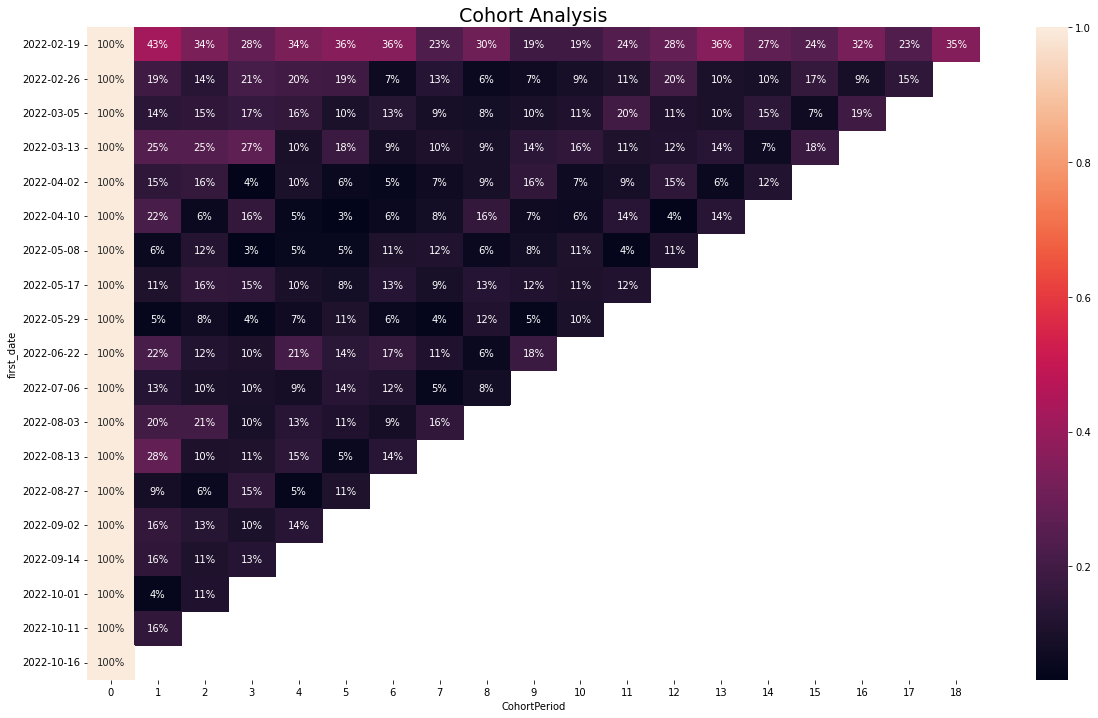

In [ ]:
plt.figure(figsize=(20, 12))
plt.title('Cohort Analysis', fontsize=19)
sns.heatmap(user_retention, annot=True, fmt='.0%')
plt.show()